### Import Libraries 

In [579]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

%matplotlib inline

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup 
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction import stop_words
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import plot_confusion_matrix

### Import cleaned csv

In [482]:
df=pd.read_csv('../datasets/cleaned_submissions.csv')

In [483]:
df.head()

,id,title,subreddit
0,hnsorg,Daredevil by Bill Sienkiewicz,Marvel
1,hnsqr9,Thats probably the most obvious example of Ult...,Marvel
2,hnsvgp,Picture of Spidey drew,Marvel
3,hnswrl,Just little drawing did,Marvel
4,hnt890,That suit did nothing for his ass,Marvel


In [484]:
#Initiate to tokenize, lemmatize words
tokenizer=RegexpTokenizer('\w+')
lemmatize = WordNetLemmatizer()
porter=PorterStemmer()

In [485]:
#Function to tokenize, lower case and remove stop words
def process_string(df):
    tokens=tokenizer.tokenize(df.lower())
    words=[word for word in tokens if not word in stopwords.words('english')]
    return (" ".join(words))

In [486]:
#tokenize, lower case and remove stop words 
clean_title=[]
for title in df['title']:
    clean_title.append(process_string(title))

In [487]:
clean_title[:5]

['daredevil bill sienkiewicz',
 'thats probably obvious example ultimates trying like movie ultimates',
 'picture spidey drew',
 'little drawing',
 'suit nothing ass']

In [488]:
model_df=pd.DataFrame()

In [489]:
model_df[['id','subreddit']]=df[['id','subreddit']]

In [490]:
model_df['submissions']=clean_title

In [491]:
model_df

,id,subreddit,submissions
0,hnsorg,Marvel,daredevil bill sienkiewicz
1,hnsqr9,Marvel,thats probably obvious example ultimates tryin...
2,hnsvgp,Marvel,picture spidey drew
3,hnswrl,Marvel,little drawing
4,hnt890,Marvel,suit nothing ass
...,...,...,...
2948,bk83dr,DCcomics,cant wait two mini series time got attention c...
2949,bk85mb,DCcomics,tuning andys guitar
2950,bk8cjg,DCcomics,love movie love scene made version hope like
2951,bk8fl3,DCcomics,shazam textless variant cover karmome shirahama


In [492]:
#Compile cleaned dataframe for modeling
#processed posts-titles
#Subreddits
#id
#target(Marvel:1,DCComics:0)

In [493]:
#Convert Subreddit into Target
model_df['target'] = df['subreddit'].map({'Marvel': 1, 'DCcomics': 0})

In [494]:
model_df

,id,subreddit,submissions,target
0,hnsorg,Marvel,daredevil bill sienkiewicz,1
1,hnsqr9,Marvel,thats probably obvious example ultimates tryin...,1
2,hnsvgp,Marvel,picture spidey drew,1
3,hnswrl,Marvel,little drawing,1
4,hnt890,Marvel,suit nothing ass,1
...,...,...,...,...
2948,bk83dr,DCcomics,cant wait two mini series time got attention c...,0
2949,bk85mb,DCcomics,tuning andys guitar,0
2950,bk8cjg,DCcomics,love movie love scene made version hope like,0
2951,bk8fl3,DCcomics,shazam textless variant cover karmome shirahama,0


#### Lemmatization

In [495]:
marvel="".join(title for title in model_df[model_df['target']==1]['submissions'])

In [496]:
marvel

'daredevil bill sienkiewiczthats probably obvious example ultimates trying like movie ultimatespicture spidey drewlittle drawingsuit nothing assresearch xmencollect current xmen seriestheres official funko favorite villain commissioned make kang kang conqueror popsomething randommay present cable cable cablesilver bronze age colorsavengers dont surrenderagents shield se totally excellent adventures mack discussion threadrussell dauterman wonderful giantsize xmen jean grey emma frostcake day gifts real cake day days reddit cake dayalex rosss avengersandy park art changes look like ultimate spidermancreate marvel version dc superhero girls characters would entailim little new marvel comics universe thor namor comics would recommendunion strikeforce marvels still going releasedmarvel reverses decision release select titles digital returning print stores updated schedule series like hawkeye freefall ghostspiderive got questionwolverine samurai inspired suitantman offer marvel unlimitedclas

In [497]:
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(marvel)
lemmatizer = WordNetLemmatizer()
lem_tokens = [lemmatizer.lemmatize(i) for i in tokens]

In [498]:
# Print only those lemmatized tokens that are different.
for i in range(len(tokens)):
    if tokens[i] != lem_tokens[i]:
        print((tokens[i], lem_tokens[i]))

('ultimates', 'ultimate')
('adventures', 'adventure')
('gifts', 'gift')
('days', 'day')
('rosss', 'ross')
('changes', 'change')
('girls', 'girl')
('characters', 'character')
('comics', 'comic')
('comics', 'comic')
('marvels', 'marvel')
('reverses', 'revers')
('titles', 'title')
('stores', 'store')
('agents', 'agent')
('movies', 'movie')
('looks', 'look')
('guys', 'guy')
('thors', 'thor')
('ideas', 'idea')
('covers', 'cover')
('faces', 'face')
('mandarins', 'mandarin')
('tales', 'tale')
('comics', 'comic')
('marvels', 'marvel')
('agents', 'agent')
('meets', 'meet')
('days', 'day')
('marvels', 'marvel')
('boxes', 'box')
('arts', 'art')
('avengers', 'avenger')
('julys', 'july')
('vs', 'v')
('drawings', 'drawing')
('vs', 'v')
('vs', 'v')
('eggs', 'egg')
('statues', 'statue')
('ships', 'ship')
('pages', 'page')
('novels', 'novel')
('vs', 'v')
('states', 'state')
('parents', 'parent')
('pups', 'pup')
('vs', 'v')
('says', 'say')
('looks', 'look')
('images', 'image')
('days', 'day')
('peters',

Lemmatizing reduces plural words into singular

### Stemming

In [499]:
porter=PorterStemmer()

In [500]:
tokens_stemm = [porter.stem(i) for i in tokens]

In [501]:
for i in range(len(tokens)):
    if tokens[i] != tokens_stemm[i]:
        print((tokens[i], tokens_stemm[i]))

('sienkiewiczthats', 'sienkiewiczthat')
('probably', 'probabl')
('obvious', 'obviou')
('example', 'exampl')
('ultimates', 'ultim')
('trying', 'tri')
('movie', 'movi')
('ultimatespicture', 'ultimatespictur')
('drewlittle', 'drewlittl')
('nothing', 'noth')
('seriestheres', 'seriesther')
('official', 'offici')
('favorite', 'favorit')
('commissioned', 'commiss')
('popsomething', 'popsometh')
('cable', 'cabl')
('cable', 'cabl')
('cablesilver', 'cablesilv')
('bronze', 'bronz')
('colorsavengers', 'colorsaveng')
('surrenderagents', 'surrenderag')
('totally', 'total')
('excellent', 'excel')
('adventures', 'adventur')
('discussion', 'discuss')
('threadrussell', 'threadrussel')
('wonderful', 'wonder')
('giantsize', 'giantsiz')
('frostcake', 'frostcak')
('gifts', 'gift')
('days', 'day')
('avengersandy', 'avengersandi')
('changes', 'chang')
('ultimate', 'ultim')
('spidermancreate', 'spidermancr')
('girls', 'girl')
('characters', 'charact')
('little', 'littl')
('comics', 'comic')
('universe', 'unive

('aaronvenomnibus', 'aaronvenomnibu')
('purchaseeverybody', 'purchaseeverybodi')
('hates', 'hate')
('sagahope', 'sagahop')
('lines', 'line')
('impressions', 'impress')
('avengerspredicting', 'avengerspredict')
('releaseshmmscorsese', 'releaseshmmscorses')
('trending', 'trend')
('movie', 'movi')
('spiderverse', 'spidervers')
('included', 'includ')
('rydermade', 'rydermad')
('avengers', 'aveng')
('piece', 'piec')
('celebration', 'celebr')
('avengers', 'aveng')
('coming', 'come')
('update', 'updat')
('sony', 'soni')
('reportedly', 'reportedli')
('artreally', 'artreal')
('shouldve', 'shouldv')
('snapped', 'snap')
('fingerslesser', 'fingersless')
('comicsbombastic', 'comicsbombast')
('dragonconmanual', 'dragonconmanu')
('approval', 'approv')
('subthanos', 'subthano')
('already', 'alreadi')
('conquered', 'conquer')
('wiped', 'wipe')
('population', 'popul')
('population', 'popul')
('wiped', 'wipe')
('snapthanos', 'snapthano')
('shoots', 'shoot')
('energy', 'energi')
('dinosaurs', 'dinosaur')


Stemming shortens the word to something not meaningful.

In [502]:
dc="".join(title for title in model_df[model_df['target']==0]['submissions'])

### set up X and y

In [598]:
X=model_df['submissions']
y=model_df['target']

In [504]:
#Instantiate CountVectorizer.
cv = CountVectorizer(ngram_range=(1,2))

# Fit CountVectorizer to training data.
cv.fit(X)

# Transform training and testing data based on the fit CountVectorizer.
X_cv = cv.transform(X)

In [505]:
# Create a DataFrame with our words.
words = pd.DataFrame(X_cv.todense(), columns=cv.get_feature_names())

In [506]:
# Let's look at the most frequently used words.
words.sum().sort_values(ascending=False).head(50)

marvel            210
batman            197
dc                179
comic             170
comics            159
art               152
new               133
spiderman         128
fan               126
like              107
fan art            99
made               97
man                94
superman           87
avengers           87
joker              81
justice            78
movie              75
would              73
series             73
one                72
think              70
black              69
iron               65
question           64
anyone             61
vs                 59
league             59
mcu                59
cover              58
endgame            58
justice league     57
time               56
first              55
know               55
best               55
iron man           55
got                53
im                 53
guys               52
discussion         50
captain            50
xmen               49
get                49
read               49
spoiler   

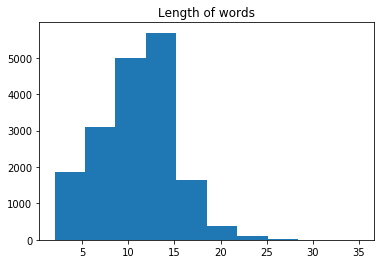

In [507]:
# Plot the lengths of the words.
words_length = [len(word) for word in words.columns]
plt.hist(words_length)
plt.title('Length of words');

The word length distibution is skewed right, which the highest word length between 10 to 15 letters. This shows the frequency of many two word combinations example iron man and justice league.

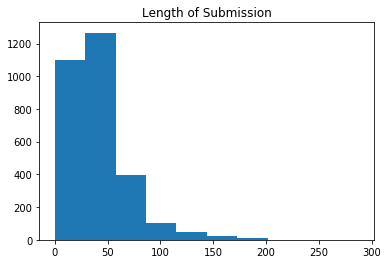

In [508]:
# Plot the lengths of the posts.
submission_length = [len(submission) for submission in X]
plt.hist(submission_length)
plt.title('Length of Submission');

Most submissions were short less than 50 words. The distibution is skewed right.

In [509]:
### Comparing words between the two reddits

In [510]:
marvel_df=model_df[model_df['target']==1]['submissions']

In [511]:
marvel_cvec=CountVectorizer(ngram_range=(1,2))

In [512]:
marvel_cvec.fit(marvel_df)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [513]:
marvel_cv = pd.DataFrame(marvel_cvec.transform(marvel_df).todense(),columns=marvel_cvec.get_feature_names())

In [514]:
marvel_top_words = marvel_cv.sum(axis=0)
marvel_top_words.sort_values(ascending = False).head(20)

marvel       199
spiderman    123
avengers      86
man           78
iron          62
comics        60
mcu           58
like          57
endgame       55
made          55
iron man      54
new           51
xmen          49
movie         48
captain       48
black         44
infinity      42
spoiler       41
know          41
thanos        41
dtype: int64

In [515]:
dc_df=model_df[model_df['target']==0]['submissions']

In [516]:
dc_cvec=CountVectorizer(ngram_range=(1,2))

In [517]:
dc_cvec.fit(dc_df)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [518]:
dc_cv = pd.DataFrame(dc_cvec.transform(dc_df).todense(),columns=dc_cvec.get_feature_names())

In [519]:
dc_top_words = dc_cv.sum(axis=0)
dc_top_words.sort_values(ascending = False).head(20)

batman            197
dc                173
comic             136
art               116
fan               103
comics             99
fan art            87
superman           83
new                82
justice            77
joker              77
league             58
justice league     56
like               50
cover              45
made               42
wonder             42
discussion         42
filmtv             41
think              38
dtype: int64

#### Set up baseline model

In [520]:
#the classes are balanced, approx 50%
y.value_counts(normalize=True)

1    0.501863
0    0.498137
Name: target, dtype: float64

The baseline accuracy score for predicting Marvel(most frequent class) is 50.18%

#### Train Test Split

In [599]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, stratify=y)

In [522]:
#Code derived from General Assembly Naive Bayes lesson
#Instantiate CountVectorizer.
cvec = CountVectorizer(ngram_range=(1,2),max_features=2500)

In [523]:
# Fit CountVectorizer to training data.
cvec.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=2500, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [524]:
len_features = len(cvec.get_feature_names())
print(len_features)

2500


In [525]:
# Transform training and testing data based on the fit CountVectorizer.
X_train_cvec = cvec.transform(X_train)

In [526]:
X_val_cvec = cvec.transform(X_val)

In [527]:
words = pd.DataFrame(X_train_cvec.todense(), columns=cvec.get_feature_names())

In [528]:
# Let's look at the most frequently used words to determine max feature inputs
words.sum().sort_values(ascending=False).head(2500)

marvel         163
batman         147
dc             128
comics         127
art            123
              ... 
make vision      2
maker            2
makes cameo      2
maleev           2
leads            2
Length: 2500, dtype: int64

In [529]:
#Print Feature Matrix
X_train_cvec.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [530]:
#Instantiate TDIDFVectorizer.
tvec=TfidfVectorizer(ngram_range=(1,2),max_features=2500)

In [531]:
tvec.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=2500,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [532]:
len_features = len(tvec.get_feature_names())
print(len_features)

2500


In [533]:
# Transform training and testing data based on the fit TfIdfVectorizer.
X_train_tvec = tvec.transform(X_train)

In [534]:
X_val_tvec = tvec.transform(X_val)

In [535]:
#Print Feature Matrix
X_train_tvec.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [536]:
weight_words = pd.DataFrame(X_train_tvec.todense(), columns=tvec.get_feature_names())

In [537]:
# Let's look at the most frequently used words to determine max feature inputs
weight_words.sum().sort_values(ascending=False).head(2500)

marvel           40.976679
batman           40.234653
art              34.309879
dc               32.232158
comics           31.759117
                   ...    
snatch            0.386850
lot people        0.353328
row               0.349892
sign petition     0.341892
daily             0.339045
Length: 2500, dtype: float64

### Modeling

Multiple classification models were explored using both count vectorizer and tfidf vectorizer to isolate the model with best accuracy score

#### Modeling with Count Vectorizer

In [538]:
pipe_cvec_lr = Pipeline([("cvec", CountVectorizer()),
                         ("lr", LogisticRegression(max_iter = 2000))])
pipe_cvec_lr_params = {"cvec__max_features": [500,1000,1500,1700,2000,2500,3000],
                       "cvec__ngram_range": [(1,1),(1,2)]
                       }
gs_cvec_lr = GridSearchCV(pipe_cvec_lr,
                          param_grid = pipe_cvec_lr_params,
                          cv = 5)
gs_cvec_lr.fit(X_train, y_train)
gs_cvec_lr_model = gs_cvec_lr.best_estimator_
gs_cvec_lr.best_params_

{'cvec__max_features': 3000, 'cvec__ngram_range': (1, 2)}

In [173]:
gs_cvec_lr.best_score_

0.8500413674759711

In [174]:
gs_cvec_lr_model.score(X_train, y_train)

0.9670280036133695

In [175]:
gs_cvec_lr_model.score(X_val, y_val)

0.8728010825439784

In [193]:
pipe_cvec_knn = Pipeline([("cvec", CountVectorizer()),
                          ("ft", FunctionTransformer(lambda x: x.todense(), accept_sparse = True)),
                          ("knn", KNeighborsClassifier())])
pipe_cvec_knn_params = {"cvec__max_features":[500,1000,1500,1700,2000,2500,3000],
                        "cvec__ngram_range": [(1,1),(1,2)],
                        "knn__n_neighbors": [10]}
gs_cvec_knn = GridSearchCV(pipe_cvec_knn,
                           param_grid = pipe_cvec_knn_params,
                           cv = 5)
gs_cvec_knn.fit(X_train, y_train)
gs_cvec_knn_model = gs_cvec_knn.best_estimator_
gs_cvec_knn.best_params_

{'cvec__max_features': 500,
 'cvec__ngram_range': (1, 1),
 'knn__n_neighbors': 10}

In [194]:
gs_cvec_knn.best_score_

0.7317293647794245

In [195]:
gs_cvec_knn_model.score(X_train, y_train)

0.8428184281842819

In [196]:
gs_cvec_knn_model.score(X_val, y_val)

0.7794316644113667

In [176]:
pipe_cvec_bnb = Pipeline([("cvec", CountVectorizer()),
                          ("ft", FunctionTransformer(lambda x: x.todense(), accept_sparse = True)),
                          ("bnb", BernoulliNB())])
pipe_cvec_bnb_params = {"cvec__max_features":[500,1000,1500,1700,2000,2500,3000],
                        "cvec__ngram_range": [(1,1),(1,2)],
                        }
gs_cvec_bnb = GridSearchCV(pipe_cvec_bnb,
                           param_grid = pipe_cvec_bnb_params,
                           cv = 5)
gs_cvec_bnb.fit(X_train, y_train)
gs_cvec_bnb_model = gs_cvec_bnb.best_estimator_
gs_cvec_bnb.best_params_

{'cvec__max_features': 3000, 'cvec__ngram_range': (1, 1)}

In [177]:
gs_cvec_bnb.best_score_

0.8522976823999265

In [178]:
gs_cvec_bnb_model.score(X_train, y_train)

0.9417344173441734

In [179]:
gs_cvec_bnb_model.score(X_val, y_val)

0.8809201623815968

In [539]:
pipe_cvec_mnb = Pipeline([("cvec", CountVectorizer()),
                          ("ft", FunctionTransformer(lambda x: x.todense(), accept_sparse = True)),
                          ("mnb", MultinomialNB())])
pipe_cvec_mnb_params = {"cvec__max_features": [500,1000,1500,1700,2000,2500,3000],
                        "cvec__ngram_range": [(1,1),(1,2)],
                        }
gs_cvec_mnb = GridSearchCV(pipe_cvec_mnb,
                           param_grid = pipe_cvec_mnb_params,
                           cv = 5)
gs_cvec_mnb.fit(X_train, y_train)
gs_cvec_mnb_model = gs_cvec_mnb.best_estimator_
gs_cvec_mnb.best_params_

{'cvec__max_features': 3000, 'cvec__ngram_range': (1, 1)}

In [540]:
gs_cvec_mnb.best_score_

0.8527522139260288

In [541]:
gs_cvec_mnb_model.score(X_train, y_train)

0.9426377597109304

In [542]:
gs_cvec_mnb_model.score(X_val, y_val)

0.878213802435724

In [184]:
pipe_cvec_gnb = Pipeline([("cvec", CountVectorizer()),
                          ("ft", FunctionTransformer(lambda x: x.todense(), accept_sparse = True)),
                          ("gnb", GaussianNB())])
pipe_cvec_gnb_params = {"cvec__max_features": [500,1000,1500,1700,2000,2500,3000],
                        "cvec__ngram_range": [(1,1),(1,2)],
                        }
gs_cvec_gnb = GridSearchCV(pipe_cvec_gnb,
                           param_grid = pipe_cvec_gnb_params,
                           cv = 5)
gs_cvec_gnb.fit(X_train, y_train)
gs_cvec_gnb_model = gs_cvec_gnb.best_estimator_
gs_cvec_gnb.best_params_

{'cvec__max_features': 1500, 'cvec__ngram_range': (1, 2)}

In [185]:
gs_cvec_gnb.best_score_

0.779580809576826

In [186]:
gs_cvec_gnb_model.score(X_train, y_train)

0.8658536585365854

In [187]:
gs_cvec_gnb_model.score(X_val, y_val)

0.7943166441136671

In [232]:
pipe_cvec_dt = Pipeline([("cvec", CountVectorizer()),
                         ("ft", FunctionTransformer(lambda x: x.todense(), accept_sparse = True)),
                         ("dt", DecisionTreeClassifier())])
pipe_cvec_dt_params = {"cvec__max_features":[500,1000,1500,1700,2000,2500,3000],
                       "cvec__ngram_range": [(1,1),(1,2)],
                       "dt__max_depth": [40],
                       "dt__min_samples_split": [40],
                       "dt__min_samples_leaf": [5]}
gs_cvec_dt = GridSearchCV(pipe_cvec_dt,
                          param_grid = pipe_cvec_dt_params,
                          cv = 5)
gs_cvec_dt.fit(X_train, y_train)
gs_cvec_dt_model = gs_cvec_dt.best_estimator_
gs_cvec_dt.best_params_

{'cvec__max_features': 2500,
 'cvec__ngram_range': (1, 2),
 'dt__max_depth': 40,
 'dt__min_samples_leaf': 5,
 'dt__min_samples_split': 40}

In [233]:
gs_cvec_dt.best_score_

0.7899798780425524

In [234]:
gs_cvec_dt_model.score(X_train, y_train)

0.8089430894308943

In [235]:
gs_cvec_dt_model.score(X_val, y_val)

0.8064952638700947

In [260]:
pipe_cvec_dt_bag = Pipeline([("cvec", CountVectorizer()),
                             ("ft", FunctionTransformer(lambda x: x.todense(), accept_sparse = True)),
                             ("bag", BaggingClassifier(base_estimator = DecisionTreeClassifier()))])
pipe_cvec_dt_bag_params = {"bag__base_estimator__max_depth": [40],
                           "bag__base_estimator__min_samples_leaf": [5],
                           "bag__base_estimator__min_samples_split": [40],
                           'cvec__max_features':[500,1000,1500,1700,2000,2500,3000],
                           'cvec__ngram_range': [(1, 1),(1,2)],
                           "bag__n_estimators": [200],
                           "bag__max_samples": [.5],
                           "bag__max_features": [.4]}
gs_cvec_dt_bag = GridSearchCV(pipe_cvec_dt_bag,
                              param_grid = pipe_cvec_dt_bag_params,
                              cv = 5)
gs_cvec_dt_bag.fit(X_train, y_train)
gs_cvec_dt_bag_model = gs_cvec_dt_bag.best_estimator_
gs_cvec_dt_bag.best_params_

{'bag__base_estimator__max_depth': 40,
 'bag__base_estimator__min_samples_leaf': 5,
 'bag__base_estimator__min_samples_split': 40,
 'bag__max_features': 0.4,
 'bag__max_samples': 0.5,
 'bag__n_estimators': 200,
 'cvec__max_features': 2000,
 'cvec__ngram_range': (1, 1)}

In [261]:
gs_cvec_dt_bag.best_score_

0.7976507359325046

In [262]:
gs_cvec_dt_bag_model.score(X_train, y_train)

0.8333333333333334

In [263]:
gs_cvec_dt_bag_model.score(X_val, y_val)

0.8281461434370772

In [274]:
pipe_cvec_rf = Pipeline([("cvec", CountVectorizer()),
                         ("ft", FunctionTransformer(lambda x: x.todense(), accept_sparse = True)),
                         ("rf", RandomForestClassifier())])
pipe_cvec_rf_params = {'cvec__max_features':[2000,2500,3000],
                       'cvec__ngram_range': [(1, 1),(1,2)],
                       "rf__n_estimators": [70],
                       "rf__max_depth": [None]}
gs_cvec_rf = GridSearchCV(pipe_cvec_rf,
                          param_grid = pipe_cvec_rf_params,
                          cv = 5)
gs_cvec_rf.fit(X_train, y_train)
gs_cvec_rf_model = gs_cvec_rf.best_estimator_
gs_cvec_rf.best_params_

{'cvec__max_features': 2000,
 'cvec__ngram_range': (1, 1),
 'rf__max_depth': None,
 'rf__n_estimators': 70}

In [275]:
gs_cvec_rf.best_score_

0.8355903292033953

In [276]:
gs_cvec_rf_model.score(X_train, y_train)

0.990063233965673

In [277]:
gs_cvec_rf_model.score(X_val, y_val)

0.8565629228687416

In [543]:
pipe_cvec_et = Pipeline([("cvec", CountVectorizer()),
                         ("ft", FunctionTransformer(lambda x: x.todense(), accept_sparse = True)),
                         ("et", ExtraTreesClassifier())])
pipe_cvec_et_params = {'cvec__max_features':[500,1000,1500,1700,2000,2500,3000],
                       'cvec__ngram_range': [(1, 1),(1,2)],
                       "et__n_estimators": [50],
                       "et__max_depth": [None]}
gs_cvec_et = GridSearchCV(pipe_cvec_et,
                          param_grid = pipe_cvec_et_params,
                          cv = 5)
gs_cvec_et.fit(X_train, y_train)
gs_cvec_et_model = gs_cvec_et.best_estimator_
gs_cvec_et.best_params_

{'cvec__max_features': 2000,
 'cvec__ngram_range': (1, 1),
 'et__max_depth': None,
 'et__n_estimators': 50}

In [544]:
gs_cvec_et.best_score_

0.8382950471384942

In [545]:
gs_cvec_et_model.score(X_train, y_train)

0.9905149051490515

In [546]:
gs_cvec_et_model.score(X_val, y_val)

0.8470906630581867

In [311]:
pipe_cvec_ada = Pipeline([("cvec", CountVectorizer()),
                          ("ft", FunctionTransformer(lambda x: x.todense(), accept_sparse = True)),
                          ("ada", AdaBoostClassifier(base_estimator = DecisionTreeClassifier()))])
pipe_cvec_ada_params = {"ada__base_estimator__max_depth": [5],
                        'cvec__max_features':[500,1000,1500],
                        'cvec__ngram_range': [(1, 1),(1,2)],
                        "ada__n_estimators": [65]}
gs_cvec_ada = GridSearchCV(pipe_cvec_ada,
                           param_grid = pipe_cvec_ada_params,
                           cv = 5)
gs_cvec_ada.fit(X_train, y_train)
gs_cvec_ada_model = gs_cvec_ada.best_estimator_
gs_cvec_ada.best_params_

{'ada__base_estimator__max_depth': 5,
 'ada__n_estimators': 65,
 'cvec__max_features': 1000,
 'cvec__ngram_range': (1, 1)}

In [312]:
gs_cvec_ada.best_score_

0.8175285742009949

In [313]:
gs_cvec_ada_model.score(X_train, y_train)

0.969286359530262

In [314]:
gs_cvec_ada_model.score(X_val, y_val)

0.8281461434370772

### Modeling with Tdidf Vectorizer

In [324]:
pipe_tvec_lr = Pipeline([("tvec",  TfidfVectorizer()),
                         ("lr", LogisticRegression(max_iter = 2000))])
pipe_tvec_lr_params = {"tvec__max_features": [3000],
                       "tvec__ngram_range": [(1,1),(1,2)]
                       }
gs_tvec_lr = GridSearchCV(pipe_tvec_lr,
                          param_grid = pipe_tvec_lr_params,
                          cv = 5)
gs_tvec_lr.fit(X_train, y_train)
gs_tvec_lr_model = gs_tvec_lr.best_estimator_
gs_tvec_lr.best_params_

{'tvec__max_features': 3000, 'tvec__ngram_range': (1, 2)}

In [325]:
gs_tvec_lr.best_score_

0.8500393246376514

In [326]:
gs_tvec_lr_model.score(X_train,y_train)

0.960252935862692

In [327]:
gs_tvec_lr_model.score(X_val,y_val)

0.8755074424898511

In [333]:
pipe_tvec_knn = Pipeline([("tvec",  TfidfVectorizer()),
                          ("ft", FunctionTransformer(lambda x: x.todense(), accept_sparse = True)),
                          ("knn", KNeighborsClassifier())])
pipe_tvec_knn_params = {"tvec__max_features":[500,1000,1500],
                        "tvec__ngram_range": [(1,1),(1,2)],
                        "knn__n_neighbors": [10,15,20]}
gs_tvec_knn = GridSearchCV(pipe_tvec_knn,
                           param_grid = pipe_tvec_knn_params,
                           cv = 5)
gs_tvec_knn.fit(X_train, y_train)
gs_tvec_knn_model = gs_tvec_knn.best_estimator_
gs_tvec_knn.best_params_

{'knn__n_neighbors': 10,
 'tvec__max_features': 500,
 'tvec__ngram_range': (1, 1)}

In [334]:
gs_tvec_knn.best_score_

0.6815715555192383

In [335]:
gs_tvec_knn_model.score(X_train,y_train)

0.7872628726287263

In [336]:
gs_tvec_knn_model.score(X_val,y_val)

0.706359945872801

In [392]:
pipe_tvec_mnb = Pipeline([("tvec",TfidfVectorizer()),
                          ("ft", FunctionTransformer(lambda x: x.todense(), accept_sparse = True)),
                          ("mnb", MultinomialNB())])
pipe_tvec_mnb_params = {"tvec__max_features": [500,1000,1500,1700,2000,2500,3000],
                        "tvec__ngram_range": [(1,1),(1,2)],
                        }
gs_tvec_mnb = GridSearchCV(pipe_tvec_mnb,
                           param_grid = pipe_tvec_mnb_params,
                           cv = 5)
gs_tvec_mnb.fit(X_train, y_train)
gs_tvec_mnb_model = gs_tvec_mnb.best_estimator_
gs_tvec_mnb.best_params_

{'tvec__max_features': 1700, 'tvec__ngram_range': (1, 1)}

In [393]:
gs_tvec_mnb.best_score_

0.8464265650695075

In [394]:
gs_tvec_mnb_model.score(X_train,y_train)

0.9345076784101174

In [395]:
gs_tvec_mnb_model.score(X_val,y_val)

0.8633288227334236

In [387]:
pipe_tvec_gnb = Pipeline([("tvec",TfidfVectorizer()),
                          ("ft", FunctionTransformer(lambda x: x.todense(), accept_sparse = True)),
                          ("gnb", GaussianNB())])
pipe_tvec_gnb_params = {"tvec__max_features": [500,1000,1500,1700,2000,2500,3000],
                        "tvec__ngram_range": [(1,1),(1,2)],
                        }
gs_tvec_gnb = GridSearchCV(pipe_tvec_gnb,
                           param_grid = pipe_tvec_gnb_params,
                           cv = 5)
gs_tvec_gnb.fit(X_train, y_train)
gs_tvec_gnb_model = gs_tvec_gnb.best_estimator_
gs_tvec_gnb.best_params_

{'tvec__max_features': 500, 'tvec__ngram_range': (1, 2)}

In [388]:
gs_tvec_gnb.best_score_

0.7755186255783786

In [389]:
gs_tvec_gnb_model.score(X_train,y_train)

0.8527551942186089

In [390]:
gs_tvec_gnb_model.score(X_val,y_val)

0.7875507442489851

In [363]:
pipe_tvec_dt_bag = Pipeline([("tvec",TfidfVectorizer()),
                             ("ft", FunctionTransformer(lambda x: x.todense(), accept_sparse = True)),
                             ("bag", BaggingClassifier(base_estimator = DecisionTreeClassifier()))])
pipe_tvec_dt_bag_params = {"bag__base_estimator__max_depth": [40],
                           "bag__base_estimator__min_samples_leaf": [5],
                           "bag__base_estimator__min_samples_split": [40],
                           'tvec__max_features':[500,1000,1500,1700,2000,2500,3000],
                           'tvec__ngram_range': [(1, 1),(1,2)],
                           "bag__n_estimators": [30],
                           "bag__max_samples": [.5],
                           "bag__max_features": [.3]}
gs_tvec_dt_bag = GridSearchCV(pipe_tvec_dt_bag,
                              param_grid = pipe_tvec_dt_bag_params,
                              cv = 5)
gs_tvec_dt_bag.fit(X_train, y_train)
gs_tvec_dt_bag_model = gs_tvec_dt_bag.best_estimator_
gs_tvec_dt_bag.best_params_

{'bag__base_estimator__max_depth': 40,
 'bag__base_estimator__min_samples_leaf': 5,
 'bag__base_estimator__min_samples_split': 40,
 'bag__max_features': 0.3,
 'bag__max_samples': 0.5,
 'bag__n_estimators': 30,
 'tvec__max_features': 2500,
 'tvec__ngram_range': (1, 1)}

In [364]:
gs_tvec_dt_bag.best_score_

0.7913261084951431

In [365]:
gs_tvec_dt_bag_model.score(X_train,y_train)

0.8360433604336044

In [366]:
gs_tvec_dt_bag_model.score(X_val,y_val)

0.8308525033829499

In [371]:
pipe_tvec_rf = Pipeline([("tvec",TfidfVectorizer()),
                         ("ft", FunctionTransformer(lambda x: x.todense(), accept_sparse = True)),
                         ("rf", RandomForestClassifier())])
pipe_tvec_rf_params = {'tvec__max_features':[500,1000,2000,2500,3000],
                       'tvec__ngram_range': [(1, 1),(1,2)],
                       "rf__n_estimators": [70],
                       "rf__max_depth": [None]}
gs_tvec_rf = GridSearchCV(pipe_tvec_rf,
                          param_grid = pipe_tvec_rf_params,
                          cv = 5)
gs_tvec_rf.fit(X_train, y_train)
gs_tvec_rf_model = gs_tvec_rf.best_estimator_
gs_tvec_rf.best_params_

{'rf__max_depth': None,
 'rf__n_estimators': 70,
 'tvec__max_features': 2500,
 'tvec__ngram_range': (1, 1)}

In [372]:
gs_tvec_rf.best_score_

0.8342451201699641

In [373]:
gs_tvec_rf_model.score(X_train,y_train)

0.9932249322493225

In [374]:
gs_tvec_rf_model.score(X_val,y_val)

0.8552097428958051

In [375]:
pipe_tvec_et = Pipeline([("tvec",TfidfVectorizer()),
                         ("ft", FunctionTransformer(lambda x: x.todense(), accept_sparse = True)),
                         ("et", ExtraTreesClassifier())])
pipe_tvec_et_params = {'tvec__max_features':[500,1000,1500,1700,2000,2500,3000],
                       'tvec__ngram_range': [(1, 1),(1,2)],
                       "et__n_estimators": [50],
                       "et__max_depth": [None]}
gs_tvec_et = GridSearchCV(pipe_tvec_et,
                          param_grid = pipe_tvec_et_params,
                          cv = 5)
gs_tvec_et.fit(X_train, y_train)
gs_tvec_et_model = gs_tvec_et.best_estimator_
gs_tvec_et.best_params_

{'et__max_depth': None,
 'et__n_estimators': 50,
 'tvec__max_features': 2000,
 'tvec__ngram_range': (1, 1)}

In [475]:
gs_tvec_et.best_score_

0.8428148269205235

In [377]:
gs_tvec_et_model.score(X_train,y_train)

0.9905149051490515

In [378]:
gs_tvec_et_model.score(X_val,y_val)

0.8565629228687416

In [383]:
pipe_tvec_ada = Pipeline([("tvec",TfidfVectorizer()),
                          ("ft", FunctionTransformer(lambda x: x.todense(), accept_sparse = True)),
                          ("ada", AdaBoostClassifier(base_estimator = DecisionTreeClassifier()))])
pipe_tvec_ada_params = {"ada__base_estimator__max_depth": [5],
                        'tvec__max_features':[500,1000,1500],
                        'tvec__ngram_range': [(1, 1),(1,2)],
                        "ada__n_estimators": [70]}
gs_tvec_ada = GridSearchCV(pipe_tvec_ada,
                           param_grid = pipe_tvec_ada_params,
                           cv = 5)
gs_tvec_ada.fit(X_train, y_train)
gs_tvec_ada_model = gs_tvec_ada.best_estimator_
gs_tvec_ada.best_params_

{'ada__base_estimator__max_depth': 5,
 'ada__n_estimators': 70,
 'tvec__max_features': 1000,
 'tvec__ngram_range': (1, 2)}

In [384]:
gs_tvec_ada.best_score_

0.7994606906836358

In [385]:
gs_tvec_ada_model.score(X_train,y_train)

0.971093044263776

In [474]:
gs_tvec_ada_model.score(X_val,y_val)

0.8092016238159675

In [547]:
### Dataframe to visualize accuracy scores for different models
scores=pd.DataFrame()

In [548]:
scores['Model Type']=['CountVectorization-LR','CountVectorization-KNN','CountVectorization-BNB','CountVectorization-MNB','CountVectorization-GNB','CountVectorization-DecisionTree','CountVectorization-DecisionTree,Bag','CountVectorization-RandomForest','CountVectorization-ExtraTrees','CountVectorization-AdaBoost','TFIDFVectorization-LR','TFIDFVectorization-KNN','TFIDFVectorization-MNB','TFIDFVectorization-GNB','TFIDFVectorization-DecisionTree,Bag','TFIDFVectorization-RandomForest','TFIDFVectorization-ExtraTrees','TFIDFVectorization-AdaBoost']
scores['Train Accuracy']=[gs_cvec_lr_model.score(X_train,y_train),gs_cvec_knn_model.score(X_train,y_train),gs_cvec_bnb_model.score(X_train,y_train),gs_cvec_mnb_model.score(X_train,y_train),gs_cvec_gnb_model.score(X_train,y_train),gs_cvec_dt_model.score(X_train,y_train),gs_cvec_dt_bag_model.score(X_train,y_train),gs_cvec_rf_model.score(X_train,y_train),gs_cvec_et_model.score(X_train,y_train),gs_cvec_ada_model.score(X_train,y_train),gs_tvec_lr_model.score(X_train,y_train),gs_tvec_knn_model.score(X_train,y_train),gs_tvec_mnb_model.score(X_train,y_train),gs_tvec_gnb_model.score(X_train,y_train),gs_tvec_dt_bag_model.score(X_train,y_train),gs_tvec_rf_model.score(X_train,y_train),gs_tvec_et_model.score(X_train,y_train),gs_tvec_ada_model.score(X_train,y_train)]
scores['Test Accuracy']=[gs_cvec_lr_model.score(X_val,y_val),gs_cvec_knn_model.score(X_val,y_val),gs_cvec_bnb_model.score(X_val,y_val),gs_cvec_mnb_model.score(X_val,y_val),gs_cvec_gnb_model.score(X_val,y_val),gs_cvec_dt_model.score(X_val,y_val),gs_cvec_dt_bag_model.score(X_val,y_val),gs_cvec_rf_model.score(X_val,y_val),gs_cvec_et_model.score(X_val,y_val),gs_cvec_ada_model.score(X_val,y_val),gs_tvec_lr_model.score(X_val,y_val),gs_tvec_knn_model.score(X_val,y_val),gs_tvec_mnb_model.score(X_val,y_val),gs_tvec_gnb_model.score(X_val,y_val),gs_tvec_dt_bag_model.score(X_val,y_val),gs_tvec_rf_model.score(X_val,y_val),gs_tvec_et_model.score(X_val,y_val),gs_tvec_ada_model.score(X_val,y_val)]
scores['Accuracy Difference']=scores['Train Accuracy']-scores['Test Accuracy']

In [549]:
scores.sort_values(by='Train Accuracy',ascending=False)

,Model Type,Train Accuracy,Test Accuracy,Accuracy Difference
15,TFIDFVectorization-RandomForest,0.993225,0.855210,0.138015
16,TFIDFVectorization-ExtraTrees,0.990515,0.856563,0.133952
8,CountVectorization-ExtraTrees,0.990515,0.847091,0.143424
7,CountVectorization-RandomForest,0.990063,0.856563,0.133500
17,TFIDFVectorization-AdaBoost,0.971093,0.809202,0.161891
9,CountVectorization-AdaBoost,0.969286,0.828146,0.141140
0,CountVectorization-LR,0.967028,0.872801,0.094227
10,TFIDFVectorization-LR,0.960253,0.875507,0.084745
3,CountVectorization-MNB,0.942638,0.878214,0.064424
2,CountVectorization-BNB,0.941734,0.880920,0.060814


After comparing all the models, Count Vectorizer, Multinomial Naive Bayes model was selected as the final model.

In [600]:
#Final Model Features
cvec_best=CountVectorizer(ngram_range=(1,1),max_features=3000)

In [601]:
cvec_best.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=3000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [602]:
X_train=cvec_best.transform(X_train)

In [603]:
X_val=cvec_best.transform(X_val)

In [606]:
func_tran=FunctionTransformer(lambda x: x.todense(), accept_sparse = True)

In [607]:
func_tran.fit(X_train)

FunctionTransformer(accept_sparse=True, check_inverse=True,
                    func=<function <lambda> at 0x0000011A16E5DEE8>,
                    inv_kw_args=None, inverse_func=None, kw_args=None,
                    validate=False)

In [608]:
X_train =func_tran.transform(X_train)

In [609]:
X_val =func_tran.transform(X_val)

In [610]:
#Initiate Multinomial Naive Bayes Classifier
nb_multinomial=MultinomialNB()

In [611]:
best_model=nb_multinomial.fit(X_train,y_train)

In [612]:
#Confusion Matrix Visualization for the best model

In [613]:
y_pred = best_model.predict(X_val)

In [614]:
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

print("True Positives: %s" % tp)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Negatives: %s" % tn)
print('')


True Positives: 332
False Positives: 51
False Negatives: 39
True Negatives: 317



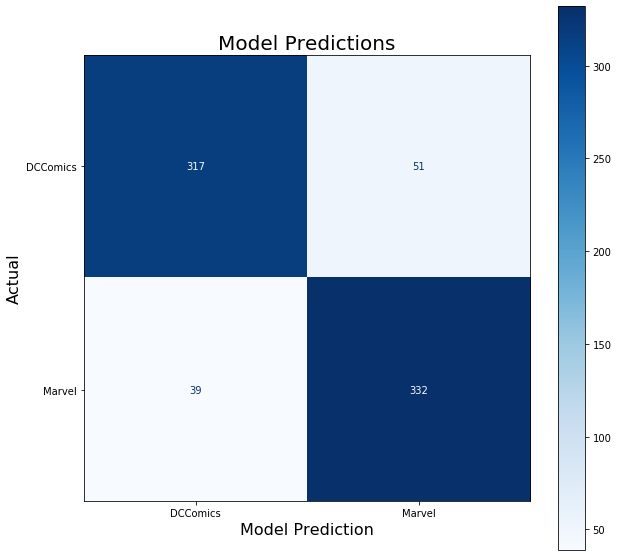

In [615]:
disp = plot_confusion_matrix(best_model, X_val, y_val, cmap = "Blues", values_format = ".3g",
                             display_labels = ["DCComics", "Marvel"])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Model Predictions', fontsize = 20)
plt.xlabel('Model Prediction', fontsize = 16)
plt.ylabel('Actual', fontsize = 16)
plt.show()

In [ ]:
#Confusion matrix metrics

In [621]:
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = tp/(tp+fp)

In [624]:
print('Sensitivity:',round(sensitivity,3))
print('Specificity:',round(specificity,3))
print('Precision:',round(precision,3))

Sensitivity: 0.895
Specificity: 0.861
Precision: 0.867


### Conclusions and Recommendations

The best classifier model was a Multinomial Naive Bayes Classifier using Count Vectorizer with a good accuracy score of 94.3%.

The best model score was a huge improvement than guessing wherever a post belonged to the Marvel subreddit or not 50.2% of the time.

The model can be further improved by looking into the posts that were misclassified.

Hyperparameters can be further explored and finetuned for various models that were analyzed. 

The total dataset consisted of only 3000 subreddit posts. Maybe more subreddit posts can be webscraped from the reddit platforms to construct a more generalized model and avoid overfitting.

For this project, only the subreddit posts were considered. As an extension to improve the model, the comments and self text columns can be considered as well. 

Subreddit posts from a non biased subreddit like r/Comics can be classified to further validate the accuracy of the model. 